## **Email Phishing Detectection Using Machine Learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
os.chdir('/content/drive/MyDrive/Colab Notebooks/')


Mounted at /content/drive/


## **Load and Observe the Dataset**

In [ ]:
# load data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Phishing_Email.csv")

In [ ]:
# Observe the first five lines of the data
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# check shape of data
df.shape

(18650, 3)

In [ ]:
# check summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
# check column labels
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [ ]:
# check statistical information
df.describe()

,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000


In [ ]:
# labels in "Unnamed: 0" variable
df["Unnamed: 0"].unique()

array([    0,     1,     2, ..., 18648, 18649, 18650])

In [ ]:
# total number of labels in "Unnamed: 0" variable
len(df["Unnamed: 0"].unique())

18650

In [ ]:
# labels in "Email Text" variable
df["Email Text"].unique()

array(['re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson \'s observations on us use of \'s on \' but not \'d aughter \' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to " sons " being " treated like senior relatives " . for one thing , we do n\'t normally use \' brother \' in this way any more than we do \'d aughter \' , and it is hard to imagine a natural class comprising senior relatives and \'s on \' but excluding \' brother \' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone \'s attention , and hence at the beginning of an utterance , whereas \'s on \' seems more natural in utterances like \' yes , son \' , \' hand me that , son \' than in ones like \' son ! \' or \' son , help me ! \' ( although perhap

In [ ]:
# total number of labels in "Email Text" variable
len(df["Email Text"].unique())

17538

In [ ]:
# labels in "Email Type" variable
df["Email Type"].unique()

array(['Safe Email', 'Phishing Email'], dtype=object)

In [ ]:
# total number of labels in "Email Type" variable
len(df["Email Type"].unique())

2

## **Clean Dataset**

In [ ]:
# clean data
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [ ]:
# drop null values
df = df.dropna()
print(df.isnull().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [ ]:
# check shape of data again
df.shape

(18634, 3)

In [ ]:
# check summary of data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18634 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18634 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18634 non-null  object
dtypes: int64(1), object(2)
memory usage: 582.3+ KB


## **Data Visualization**

In [ ]:
# data visualization
email_type = df["Email Type"].value_counts()
print(email_type.unique(),"\n")
print(email_type)

[11322  7312] 

Safe Email        11322
Phishing Email     7312
Name: Email Type, dtype: int64


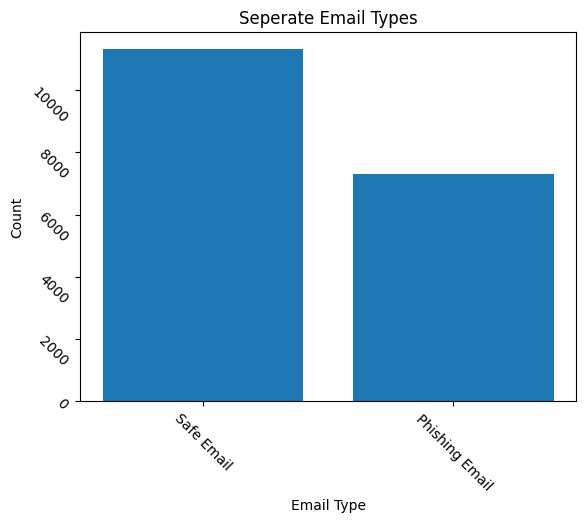

In [ ]:
# bar chart
plt.bar(df["Email Type"].unique(), df["Email Type"].value_counts())
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Seperate Email Types")
plt.xticks(rotation=315)
plt.yticks(rotation=315)
plt.show()

## **Models by Faizan Khan**

## **Support Vector Machine (SVM) on Imbalanced Data**

In [ ]:
# prepare model with imbalanced data
svm1_X = df["Email Text"].values
svm1_y = df["Email Type"].values

print(svm1_X.shape)

(18634,)


In [ ]:
# convert text into numerical values using TF IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer()
svm1_X = vectorizer1.fit_transform(svm1_X)

In [ ]:
# split data into training and test
from sklearn.model_selection import train_test_split
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = train_test_split(svm1_X, svm1_y, test_size = 0.2, random_state = 42)

print("Safe Email: ", svm1_X[svm1_y == "Safe Email"].shape[0])
print("Phishing Email: ", svm1_X[svm1_y == "Phishing Email"].shape[0], "\n")

print("Training Set", X_train_svm1.shape)
print("Test Set", X_test_svm1.shape)

Safe Email:  11322
Phishing Email:  7312 

Training Set (14907, 163224)
Test Set (3727, 163224)


In [ ]:
# train model with SVM on imbalanced data
from sklearn import svm
svm1 = svm.SVC()

svm1.fit(X_train_svm1, y_train_svm1)

SVC()

In [ ]:
# Predict
predict1 = svm1.predict(X_test_svm1)
print(predict1)

['Safe Email' 'Phishing Email' 'Safe Email' ... 'Phishing Email'
 'Safe Email' 'Safe Email']


In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy1 = accuracy_score(y_test_svm1, predict1)
print("Accuracy of SVM with imbalanced data:", accuracy1, "\n")

matrix1 = confusion_matrix(y_test_svm1, predict1)
print("Confusion Matrix:")
print(matrix1)

Accuracy of SVM with imbalanced data: 0.9745103300241481 

Confusion Matrix:
[[1497   21]
 [  74 2135]]


## **Resampling Data to Balance It Out**

In [ ]:
# resampling the data to balance it out
safe = df[df["Email Type"] == "Safe Email"]
phishing = df[df["Email Type"] == "Phishing Email"]
safe = safe.sample(phishing.shape[0])

print(safe.shape)
print(phishing.shape)

(7312, 3)
(7312, 3)


In [ ]:
# concat the balanced data
new_data = pd.concat([safe, phishing], ignore_index = True)
new_data.head()

,Unnamed: 0,Email Text,Email Type
0,5415,re : various topics thanks for the note great ...,Safe Email
1,12756,"URL: http://www.newsisfree.com/click/-0,835789...",Safe Email
2,7717,tables report - 9 / 25 / 01 please see the att...,Safe Email
3,4883,\nYannick Gingras wrote:> > What do you mean b...,Safe Email
4,14136,"re : thursday visit frank , we are located at ...",Safe Email


## **Support Vector Machine (SVM) on Balanced Data**

In [ ]:
# prepare model again with balanced data
svm2_X = new_data["Email Text"].values
svm2_y = new_data["Email Type"].values

print(svm2_X.shape)

(14624,)


In [ ]:
# convert text into numerical values using TF IDF Vectorization
vectorizer2 = TfidfVectorizer()
svm2_X = vectorizer2.fit_transform(svm2_X)

In [ ]:
# split the balanced model into training and testing
X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2 = train_test_split(svm2_X, svm2_y, test_size = 0.2, random_state = 42)

print("Safe Email: ", svm2_X[svm2_y == "Safe Email"].shape[0])
print("Phishing Email: ", svm2_X[svm2_y == "Phishing Email"].shape[0], "\n")

print("Training Set: ", X_train_svm2.shape)
print("Test Set: ", X_test_svm2.shape)

Safe Email:  7312
Phishing Email:  7312 

Training Set:  (11699, 143731)
Test Set:  (2925, 143731)


In [ ]:
# train model again with SVM on balanced data
svm2 = svm.SVC()

svm2.fit(X_train_svm2, y_train_svm2)

SVC()

In [ ]:
# predict
predict2 = svm2.predict(X_test_svm2)
print(predict2)

['Phishing Email' 'Phishing Email' 'Safe Email' ... 'Safe Email'
 'Safe Email' 'Phishing Email']


In [ ]:
# Evaluate
accuracy2 = accuracy_score(y_test_svm2, predict2)
print("Accuracy of SVM with balanced data:", accuracy2, "\n")

matrix2 = confusion_matrix(y_test_svm2, predict2)
print("Confusion Matrix:")
print(matrix2)

Accuracy of SVM with balanced data: 0.9747008547008547 

Confusion Matrix:
[[1476   16]
 [  58 1375]]


## **K-Means Clustering (Unsupervised)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd

text_column = "Email Text"
type_column = "Email Type"

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# TFIDF Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df[text_column])

# k-means clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
train_df['Cluster'] = kmeans.fit_predict(X_train)

# Convert predicted labels to match the data type of true labels
label_mapping = {'Safe Email': 0, 'Phishing Email': 1}
train_df['Cluster'] = train_df['Cluster'].map({v: k for k, v in label_mapping.items()})

# Evaluate using confusion matrix, precision, and recall
conf_matrix = confusion_matrix(train_df[type_column], train_df['Cluster'])
precision = precision_score(train_df[type_column], train_df['Cluster'], average='weighted')
recall = recall_score(train_df[type_column], train_df['Cluster'], average='weighted')

print("Confusion Matrix:\n", conf_matrix, "\n")
print("Precision:", precision)
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Confusion Matrix:
 [[ 261 5533]
 [ 162 8951]] 

Precision: 0.6176148660876889
Recall: 0.6179647145636278


## **Models by Isaiah Alviola**

## **Logistic Regression**

Saving Phishing_Email.csv to Phishing_Email.csv


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1457
           1       0.98      0.97      0.98      2273

    accuracy                           0.97      3730
   macro avg       0.97      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730



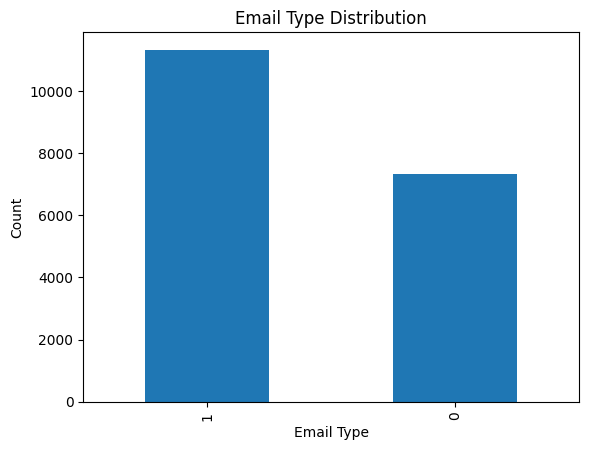

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files


uploaded = files.upload()


import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df = pd.read_csv(io.BytesIO(uploaded['Phishing_Email.csv']))

# DATA PREPROCESSING:

# Fill NaN values in 'Email Text' with empty strings
df['Email Text'] = df['Email Text'].fillna('')


# Convert 'Email Type' from 'Safe Email'/'Phishing Email' to numerical (0/1)
label_encoder = LabelEncoder()
df['Email Type'] = label_encoder.fit_transform(df['Email Type']) # 'Safe Email' might be 0 and 'Phishing Email' might be 1, or vice versa

# Splitting the data into features and labels
X = df['Email Text']
y = df['Email Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing and feature extraction
vectorizer = CountVectorizer() #Convert a collection of text documents to a matrix of token counts.
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_counts, y_train)

# Evaluate the model
predictions = model.predict(X_test_counts)
print(classification_report(y_test, predictions))

# Visualize the distribution of email types
df['Email Type'].value_counts().plot(kind='bar')
plt.title('Email Type Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

## **CNN**

Epoch 1/10
187/187 [==============================] - 328s 2s/step - loss: 0.2431 - accuracy: 0.8829 - val_loss: 0.0723 - val_accuracy: 0.9695
Epoch 2/10
187/187 [==============================] - 315s 2s/step - loss: 0.0374 - accuracy: 0.9844 - val_loss: 0.0698 - val_accuracy: 0.9725
Epoch 3/10
187/187 [==============================] - 317s 2s/step - loss: 0.0213 - accuracy: 0.9881 - val_loss: 0.0633 - val_accuracy: 0.9739
Epoch 4/10
187/187 [==============================] - 304s 2s/step - loss: 0.0203 - accuracy: 0.9889 - val_loss: 0.0610 - val_accuracy: 0.9765
Epoch 5/10
187/187 [==============================] - 307s 2s/step - loss: 0.0201 - accuracy: 0.9889 - val_loss: 0.0622 - val_accuracy: 0.9765
Epoch 6/10
187/187 [==============================] - 303s 2s/step - loss: 0.0200 - accuracy: 0.9889 - val_loss: 0.0636 - val_accuracy: 0.9765
Epoch 7/10
187/187 [==============================] - 302s 2s/step - loss: 0.0200 - accuracy: 0.9889 - val_loss: 0.0655 - val_accuracy: 0.9772

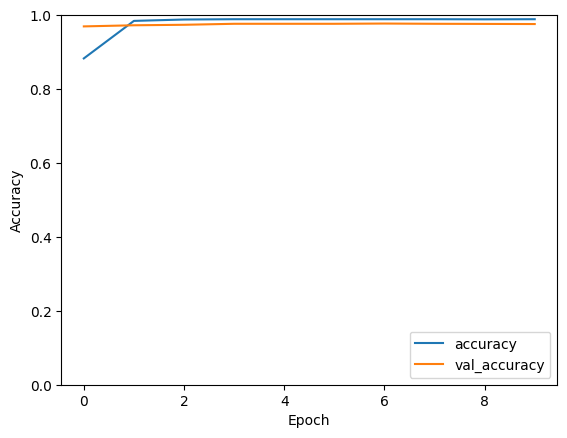

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Input
from tensorflow.keras.models import Model

# Load the dataset
df = pd.read_csv('Phishing_Email.csv')

# DATA PREPROCESSING:
df['Email Text'] = df['Email Text'].fillna('')

label_encoder = LabelEncoder()
df['Email Type'] = label_encoder.fit_transform(df['Email Type'])

# Split the data into features and labels
X = df['Email Text']
y = df['Email Type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing and tokenization
max_sequence_length = 1000
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Build the CNN model
embedding_dim = 100
num_filters = 128
filter_sizes = [3, 4, 5]

input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length)(input_layer)
conv_layers = []

for filter_size in filter_sizes:
    conv_layer = Conv1D(num_filters, filter_size, activation='relu')(embedding_layer)
    max_pooling_layer = GlobalMaxPooling1D()(conv_layer)
    conv_layers.append(max_pooling_layer)

concatenated = tf.keras.layers.concatenate(conv_layers, axis=1)
dense_layer = Dense(128, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
predictions = model.predict(X_test_padded)
y_pred = (predictions > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()